# Caso 1: Predicción de Deserción de Clientes


Descripción

El objetivo de este caso es predecir la deserción de clientes de una empresa de telecomunicaciones utilizando un modelo de regresión logística.

- 1 Importar Librerias

In [22]:
# Importar librerías 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Se importan las librerías necesarias para el análisis de datos, preprocesamiento, modelado y visualización.

- 2 Carga y Exploracion del dataset

In [23]:
#Cargar datos
df = pd.read_csv('../datos/Telco-Customer-Churn.csv')

Descripcion: Se crea una copia del mismo para su manipulación. Luego, se muestra una vista previa de los primeros registros.

In [24]:
# Exploramos el dataset
df_copia = df.copy()
df_copia.head() 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- 3 Eliminar Columnas Irrelevantes

Descripcion: Se elimina la columna customerID ya que no es relevante para el análisis.

In [25]:
df_copia = df_copia.drop(['customerID'], axis=1)

- 4 Verificar Valores Nulos

Descripcion: Se verifica si hay valores nulos en el dataset.

In [26]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


- 5 Ver Tipos de Datos

Descripcion: Se muestra información sobre los tipos de datos de cada columna.

In [27]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- 6 Convertir Variables Categóricas en Números

Descripcion: Se convierten las variables categóricas en variables numéricas utilizando LabelEncoder.

In [28]:
encoder = LabelEncoder()
for column in df_copia.select_dtypes(include='object'):
    df_copia[column] = encoder.fit_transform(df_copia[column])

# Verificar el dataset preprocesado
df_copia.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


- 7 Separar Características y Etiqueta

Descripcion: Se separan las características (X) y la etiqueta (y), donde Churn es la variable objetivo que indica si un cliente ha desertado o no.

In [29]:
# Separar características (X) y etiqueta (y) #Churn es palabra clave para saber si el cliente deserto
X = df_copia.drop('Churn', axis=1)
y = df_copia['Churn']


- 8 Dividir en Datos de Entrenamiento y Prueba

Descripcion: Se dividen los datos en conjuntos de entrenamiento y prueba, utilizando el 20% de los datos para la prueba.

In [30]:
# Dividir en datos de entrenamiento y prueba
# 0.2 es el 20% de datos se usara para evaluar
# 80% se usa para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- 9. Entrenar el Modelo con Regresión Logística

Utiliza un modelo adecuado para problemas de clasificación binaria, como la deserción de clientes

Descripcion: Se entrena un modelo de regresión logística con los datos de entrenamiento.



In [31]:
# Entrenar el modelo con Regresión Logística 
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

- 10. Hacer Predicciones y Evaluar el Modelo

Descripcion: Se hacen predicciones con los datos de prueba y se evalúa el modelo calculando la precisión y generando un informe de clasificación

In [32]:
# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Calcular métricas
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))


Exactitud: 0.8161816891412349

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



- 11 Generar Matriz de Confusion

Descripcion: Se genera y visualiza una matriz de confusión para analizar el rendimiento del modelo en términos de predicciones correctas e incorrectas.

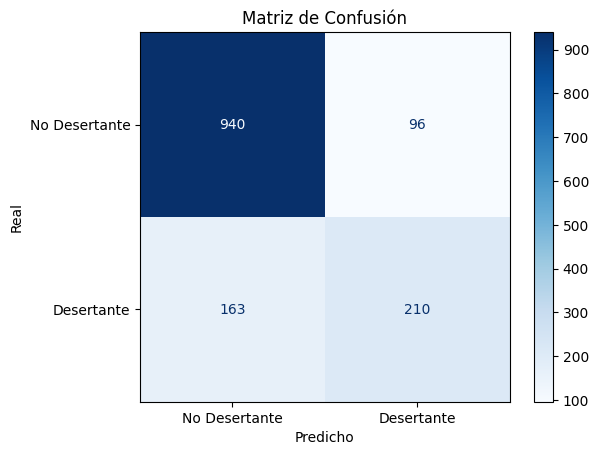

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Desertante', 'Desertante'])
disp.plot(cmap=plt.cm.Blues)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

Verdaderos Positivos (TP): Clientes que desertaron y fueron correctamente clasificados como desertantes.

Verdaderos Negativos (TN): Clientes que no desertaron y fueron correctamente clasificados como no desertantes.

Falsos Positivos (FP): Clientes que no desertaron pero fueron incorrectamente clasificados como desertantes.

Falsos Negativos (FN): Clientes que desertaron pero fueron incorrectamente clasificados como no desertantes

# Conclusion

En este caso, se utilizó un modelo de regresión logística para predecir la deserción de clientes de una empresa de telecomunicaciones. El modelo mostró una precisión del 81.6%, lo que indica un buen rendimiento en la clasificación de clientes desertantes y no desertantes. La matriz de confusión reveló que el modelo tiene una alta tasa de verdaderos positivos y verdaderos negativos, aunque también presenta algunos falsos positivos y falsos negativos.

El análisis identificó factores clave que influyen en la deserción de clientes, proporcionando información valiosa para la empresa en la toma de decisiones estratégicas. Aunque el modelo de regresión logística funcionó bien, se recomienda explorar modelos más avanzados para mejorar aún más la precisión y reducir las predicciones incorrectas.

"Usé la regresión logística porque el problema es de clasificación binaria y este modelo es fácil de
interpretar y eficiente. Los resultados fueron buenos, identificando factores clave en la deserción de clientes, lo que ayuda a la empresa a tomar mejores decisiones. Aunque el modelo funcionó bien, se podrían probar otros más avanzados para mejorar la precisión."